Krishna Sharma | AP22110010128

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, suppress=True)

Low-rank Approximations

In [9]:
A = np.array([
    [1, 2, 3, 4],
    [1, 1, 2, 3],
    [0, 1, 1, 0]
], dtype=float)

print("Original Matrix A:")
print(A)
print(f"Shape: {A.shape} (3 rows × 4 columns)")

Original Matrix A:
[[1. 2. 3. 4.]
 [1. 1. 2. 3.]
 [0. 1. 1. 0.]]
Shape: (3, 4) (3 rows × 4 columns)


In [10]:
U, s, VT = np.linalg.svd(A, full_matrices=True)

print(f"U matrix (shape {U.shape}):")
print(U)

U matrix (shape (3, 3)):
[[ 0.8109  0.0934 -0.5776]
 [ 0.57   -0.3493  0.7437]
 [ 0.1323  0.9324  0.3365]]


In [11]:
print("This is an orthogonal matrix. Checking U * U^T = Identity:")
print(U @ U.T)

This is an orthogonal matrix. Checking U * U^T = Identity:
[[ 1.  0.  0.]
 [ 0.  1. -0.]
 [ 0. -0.  1.]]


In [13]:
print(f"Singular values (shape {s.shape}):")
print(s)

Singular values (shape (3,)):
[6.7509 1.1734 0.2186]


In [14]:
print(f"V^T matrix (shape {VT.shape}):")
print(VT)
print("\nThis is also orthogonal. Checking VT * VT^T = Identity:")
print(VT @ VT.T)

V^T matrix (shape (4, 4)):
[[ 0.2046  0.3443  0.5488  0.7338]
 [-0.2181  0.6561  0.438  -0.5746]
 [ 0.7598 -0.3431  0.4167 -0.3625]
 [-0.5774 -0.5774  0.5774  0.    ]]

This is also orthogonal. Checking VT * VT^T = Identity:
[[ 1.  0. -0.  0.]
 [ 0.  1.  0.  0.]
 [-0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [16]:
SD = np.diag(s) 
print(f"Diagonal matrix from singular values (3×3):")
print(SD)

Sigma = np.zeros((3, 4))
Sigma[:3, :3] = SD 
print(f"\nFull Sigma matrix (3×4):")
print(Sigma)

Diagonal matrix from singular values (3×3):
[[6.7509 0.     0.    ]
 [0.     1.1734 0.    ]
 [0.     0.     0.2186]]

Full Sigma matrix (3×4):
[[6.7509 0.     0.     0.    ]
 [0.     1.1734 0.     0.    ]
 [0.     0.     0.2186 0.    ]]


In [19]:
A_reconstructed = U @ Sigma @ VT
print(f"Reconstructed matrix (U * Sigma * V^T):")
print(A_reconstructed)
print("\nThis matches our original matrix A")

Reconstructed matrix (U * Sigma * V^T):
[[ 1.  2.  3.  4.]
 [ 1.  1.  2.  3.]
 [ 0.  1.  1. -0.]]

This matches our original matrix A


In [20]:
k = 2 
s_modified = s.copy()
s_modified[2] = 0  
print(f"Modified singular values: {s_modified}")

Modified singular values: [6.7509 1.1734 0.    ]


In [21]:
SD_modified = np.diag(s_modified)
Sigma_modified = np.zeros((3, 4))
Sigma_modified[:3, :3] = SD_modified

print(f"Modified Sigma matrix (last singular value = 0):")
print(Sigma_modified)

A_rank2 = U @ Sigma_modified @ VT

print(f"\nRank-2 Approximation of A:")
print(A_rank2)

Modified Sigma matrix (last singular value = 0):
[[6.7509 0.     0.     0.    ]
 [0.     1.1734 0.     0.    ]
 [0.     0.     0.     0.    ]]

Rank-2 Approximation of A:
[[ 1.096   1.9567  3.0526  3.9542]
 [ 0.8764  1.0558  1.9322  3.0589]
 [-0.0559  1.0252  0.9693  0.0267]]


In [22]:
print(f"Comparing with Original A:")
print(A)

print(f"\nDifference (Error) = A - A_rank2:")
error_matrix = A - A_rank2
print(error_matrix)

frobenius_norm = np.linalg.norm(error_matrix, 'fro')
print(f"\nFrobenius Norm of Error: {frobenius_norm:.4f}")

Comparing with Original A:
[[1. 2. 3. 4.]
 [1. 1. 2. 3.]
 [0. 1. 1. 0.]]

Difference (Error) = A - A_rank2:
[[-0.096   0.0433 -0.0526  0.0458]
 [ 0.1236 -0.0558  0.0678 -0.0589]
 [ 0.0559 -0.0252  0.0307 -0.0267]]

Frobenius Norm of Error: 0.2186


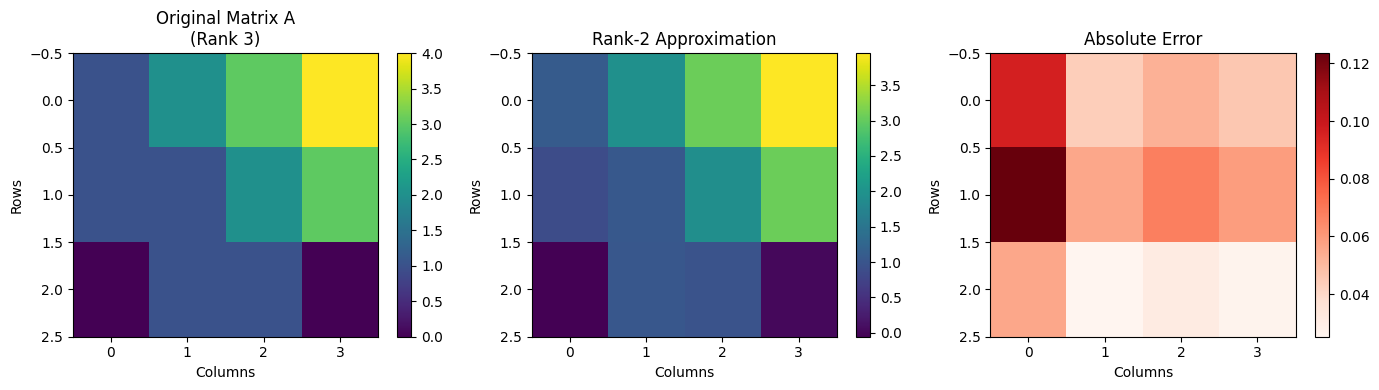

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

im1 = axes[0].imshow(A, cmap='viridis', aspect='auto')
axes[0].set_title('Original Matrix A\n(Rank 3)')
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Rows')
plt.colorbar(im1, ax=axes[0])

im2 = axes[1].imshow(A_rank2, cmap='viridis', aspect='auto')
axes[1].set_title('Rank-2 Approximation')
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Rows')
plt.colorbar(im2, ax=axes[1])

im3 = axes[2].imshow(np.abs(error_matrix), cmap='Reds', aspect='auto')
axes[2].set_title('Absolute Error')
axes[2].set_xlabel('Columns')
axes[2].set_ylabel('Rows')
plt.colorbar(im3, ax=axes[2])

plt.tight_layout()
plt.show()

Latent semantic indexing

In [24]:
documents = [
    "data mining",
    "data analysis",
    "computer information retrieval",
    "medical health information"
]

print("Document Collection:")
for i, doc in enumerate(documents):
    print(f"  Doc {i}: '{doc}'")

Document Collection:
  Doc 0: 'data mining'
  Doc 1: 'data analysis'
  Doc 2: 'computer information retrieval'
  Doc 3: 'medical health information'


In [25]:
vocabulary = []
for doc in documents:
    words = doc.split()
    for word in words:
        if word not in vocabulary:
            vocabulary.append(word)

vocabulary = sorted(vocabulary)
print(f"Vocabulary ({len(vocabulary)} terms): {vocabulary}")

Vocabulary (8 terms): ['analysis', 'computer', 'data', 'health', 'information', 'medical', 'mining', 'retrieval']


In [26]:
term_doc_matrix = np.zeros((len(vocabulary), len(documents)))

for doc_idx, doc in enumerate(documents):
    words = doc.split()
    for word in words:
        term_idx = vocabulary.index(word)
        term_doc_matrix[term_idx, doc_idx] += 1

print("Term-Document Matrix A:")
print("(rows = terms, columns = documents)")
print(term_doc_matrix)

Term-Document Matrix A:
(rows = terms, columns = documents)
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [27]:
U, s, VT = np.linalg.svd(term_doc_matrix, full_matrices=False)

print(f"U (term-concept matrix): shape {U.shape}")
print(f"Singular values: {s}")
print(f"V^T (document-concept matrix): shape {VT.shape}")

U (term-concept matrix): shape (8, 4)
Singular values: [2.     1.7321 1.4142 1.    ]
V^T (document-concept matrix): shape (4, 4)


In [28]:
variance_explained = (s ** 2) / np.sum(s ** 2) * 100
for i, var in enumerate(variance_explained):
    print(f"  Concept {i+1}: {var:.2f}%")

  Concept 1: 40.00%
  Concept 2: 30.00%
  Concept 3: 20.00%
  Concept 4: 10.00%


In [29]:
k = 2
print(f"\n--- Keeping top {k} concepts ---")

U_k = U[:, :k]
s_k = s[:k]
VT_k = VT[:k, :]

print(f"U_k shape: {U_k.shape}")
print(f"Singular values kept: {s_k}")
print(f"VT_k shape: {VT_k.shape}")


--- Keeping top 2 concepts ---
U_k shape: (8, 2)
Singular values kept: [2.     1.7321]
VT_k shape: (2, 4)


In [30]:
Sigma_k = np.diag(s_k)
doc_concept = Sigma_k @ VT_k

print(f"Document representations in {k}D concept space:")
print(doc_concept)
print("(columns represent documents)")

Document representations in 2D concept space:
[[ 0.      0.     -1.4142 -1.4142]
 [-1.2247 -1.2247  0.      0.    ]]
(columns represent documents)


In [32]:
query = "data"
print(f"Query: '{query}'")

query_vector = np.zeros(len(vocabulary))
for word in query.split():
    if word in vocabulary:
        term_idx = vocabulary.index(word)
        query_vector[term_idx] = 1

print(f"Query vector (in term space):")
print(query_vector)

Query: 'data'
Query vector (in term space):
[0. 0. 1. 0. 0. 0. 0. 0.]


In [33]:
Sigma_k_inv = np.linalg.inv(Sigma_k)
query_concept = query_vector @ U_k @ Sigma_k_inv

print(f"Query in concept space:")
print(query_concept)

Query in concept space:
[-0.     -0.4714]


In [35]:
print(f"--- Document Similarities (Cosine Similarity) ---")
similarities = []

for i in range(len(documents)):
    doc_vec = doc_concept[:, i]
    
    dot_product = np.dot(query_concept, doc_vec)
    query_norm = np.linalg.norm(query_concept)
    doc_norm = np.linalg.norm(doc_vec)
    
    if query_norm > 0 and doc_norm > 0:
        similarity = dot_product / (query_norm * doc_norm)
    else:
        similarity = 0
    
    similarities.append(similarity)
    print(f"Doc {i}: similarity = {similarity:.4f} | '{documents[i]}'")

--- Document Similarities (Cosine Similarity) ---
Doc 0: similarity = 1.0000 | 'data mining'
Doc 1: similarity = 1.0000 | 'data analysis'
Doc 2: similarity = 0.0000 | 'computer information retrieval'
Doc 3: similarity = 0.0000 | 'medical health information'


In [37]:
ranked_indices = np.argsort(similarities)[::-1]

print(f"--- Ranked Results for query '{query}' ---")
for rank, idx in enumerate(ranked_indices, 1):
    print(f"{rank}. Doc {idx} (similarity={similarities[idx]:.4f}): '{documents[idx]}'")

--- Ranked Results for query 'data' ---
1. Doc 0 (similarity=1.0000): 'data mining'
2. Doc 1 (similarity=1.0000): 'data analysis'
3. Doc 2 (similarity=0.0000): 'computer information retrieval'
4. Doc 3 (similarity=0.0000): 'medical health information'


Krishna Sharma | AP22110010128